In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 读取训练集和测试集CSV文件
train_data = pd.read_csv("data\\train.csv")
test_data = pd.read_csv("data\\test.csv")
m, n = train_data.shape

# 选择训练集特征和标签列
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

# 选择测试集特征列
X_test = test_data.iloc[:, 1:].values
X_train, X_test = X_train / 255, X_test / 255
y_dev = test_data.iloc[:, 0].values #测试集对应的真实标签

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (42000, 784)
y_train shape: (42000,)
X_test shape: (28000, 784)


In [17]:


class LogisticRegression:
    def __init__(self, learning_rate=0.05, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.classifiers = {}

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.num_classes = len(np.unique(y))
        for i in range(self.num_classes):
            # 将类别 i 视为正类，其他类别视为负类
            binary_y = np.where(y == i, 1, 0)
            self.classifiers[i] = self._fit_binary(X, binary_y)
        

    def _fit_binary(self, X, binary_y):
        num_samples, num_features = X.shape
        weights = np.zeros((num_features, 1)).squeeze()
        bias = 0
        
        loss_history = []
        accuracy_history = []

        # 初始化列表来存储损失值和准确率

        # 梯度下降优化
        for i in range(self.num_iterations):
            # 计算预测值
            y_pred = self.sigmoid(np.dot(X, weights) + bias)

            # 计算损失值和准确率
            loss = self._compute_loss(y_pred, binary_y)
            accuracy = self._compute_accuracy(y_pred, binary_y)
            loss_history.append(loss)
            accuracy_history.append(accuracy)

            # 计算梯度
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - binary_y))
            db = (1 / num_samples) * np.sum(y_pred - binary_y, axis=0)

            # 更新参数
            weights -= self.learning_rate * dw
            bias -= self.learning_rate * db

        # 绘制损失率和正确率随迭代轮数变化的曲线图
        self._plot_history(loss_history, accuracy_history)

        return (weights, bias)

    def _compute_loss(self, y_pred, binary_y):
        # 使用二进制交叉熵损失函数
        loss = np.mean(-binary_y * np.log(y_pred) - (1 - binary_y) * np.log(1 - y_pred))
        return loss

    def _compute_accuracy(self, y_pred, binary_y):
        # 将预测概率转换为类别标签
        y_pred_labels = (y_pred > 0.5).astype(int)
        # 计算准确率
        accuracy = np.mean(y_pred_labels == binary_y)
        return accuracy

    def _plot_history(self, loss_history, accuracy_history):
        # 绘制损失率曲线
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(range(self.num_iterations), loss_history)
        plt.title('Loss Rate')
        plt.xlabel('Iteration')
        plt.ylabel('Loss Rate')

        # 绘制正确率曲线
        plt.subplot(1, 2, 2)
        plt.plot(range(self.num_iterations), accuracy_history)
        plt.title('Accuracy Rate')
        plt.xlabel('Iteration')
        plt.ylabel('Accuracy Rate')

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        # 初始化概率矩阵
        probabilities = np.zeros((X.shape[0], self.num_classes))

        # 对每个类别进行预测
        for i in range(self.num_classes):
            weights, bias = self.classifiers[i]
            y_pred_prob = self.sigmoid(np.dot(X, weights) + bias)
            probabilities[:, i] = y_pred_prob.squeeze()

        # 选择具有最高概率的类别作为预测结果
        y_pred_labels = np.argmax(probabilities, axis=1)
        return y_pred_labels


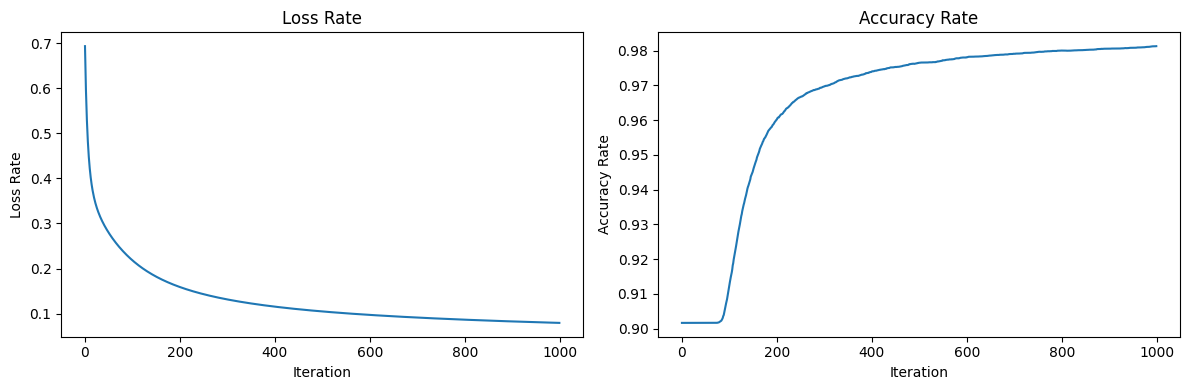

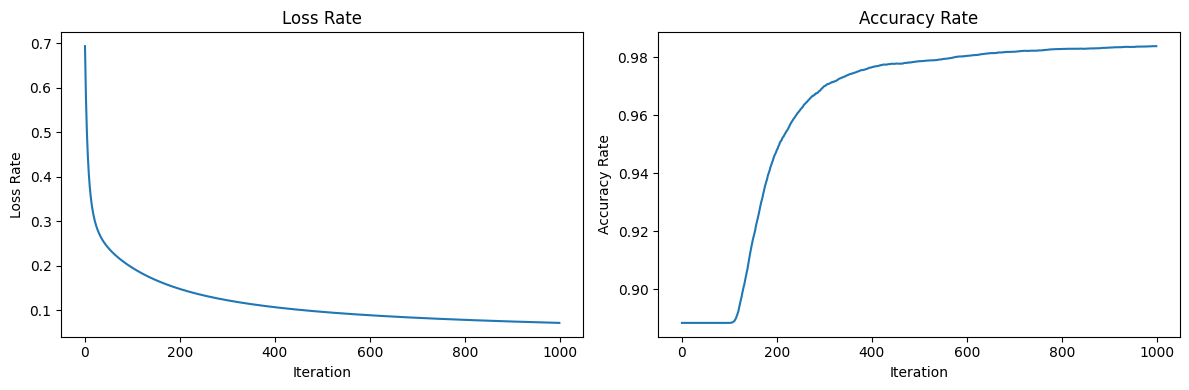

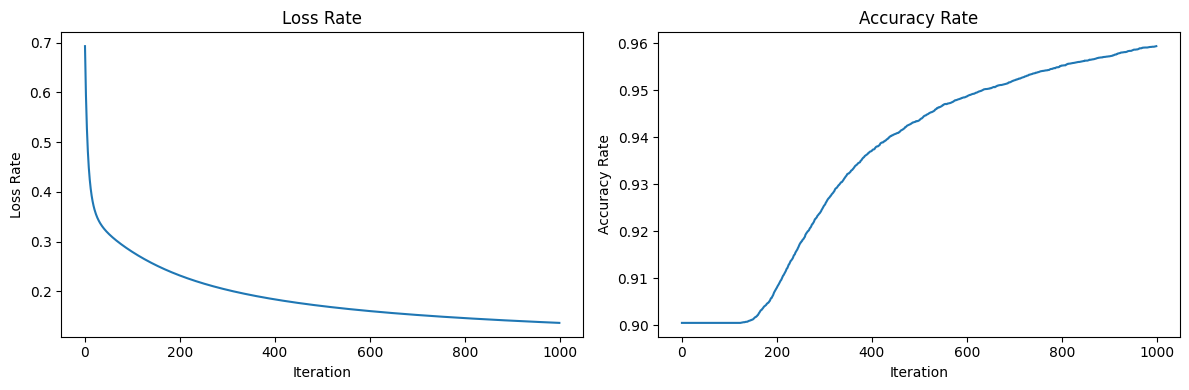

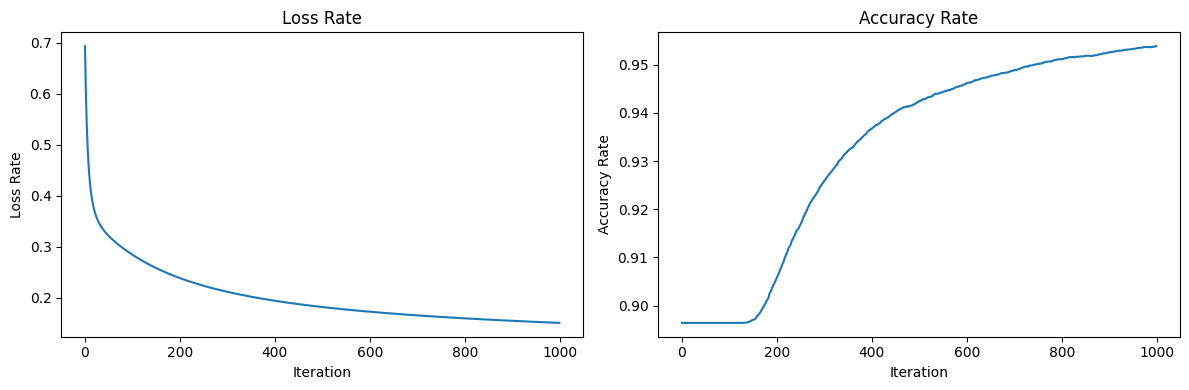

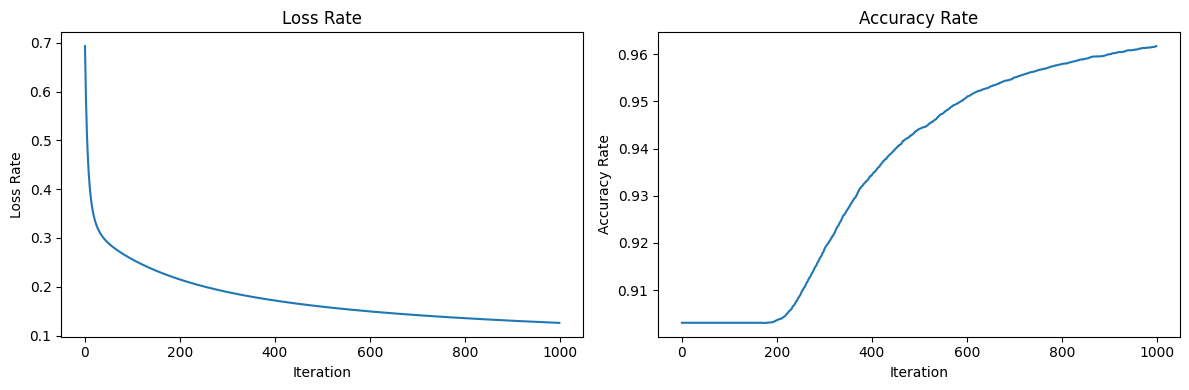

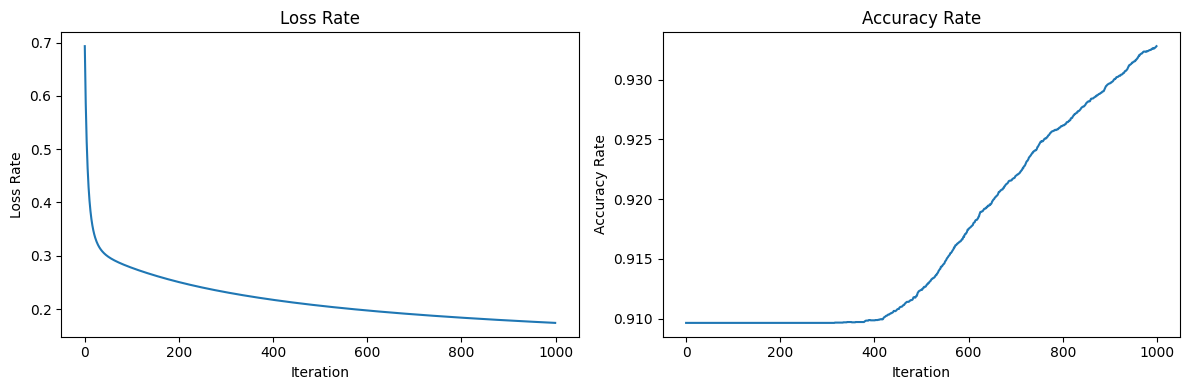

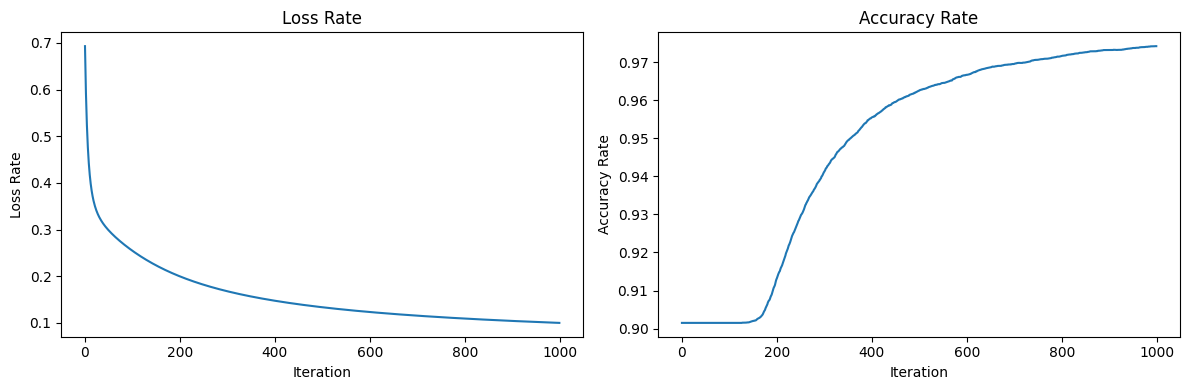

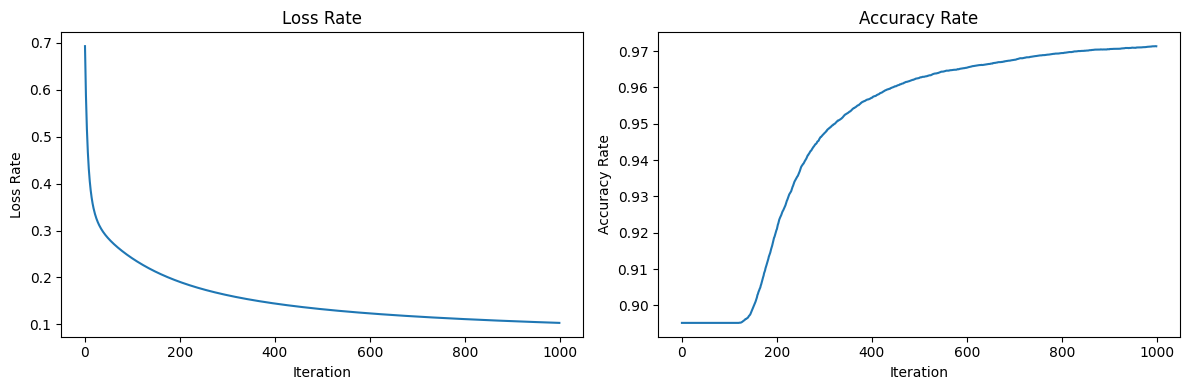

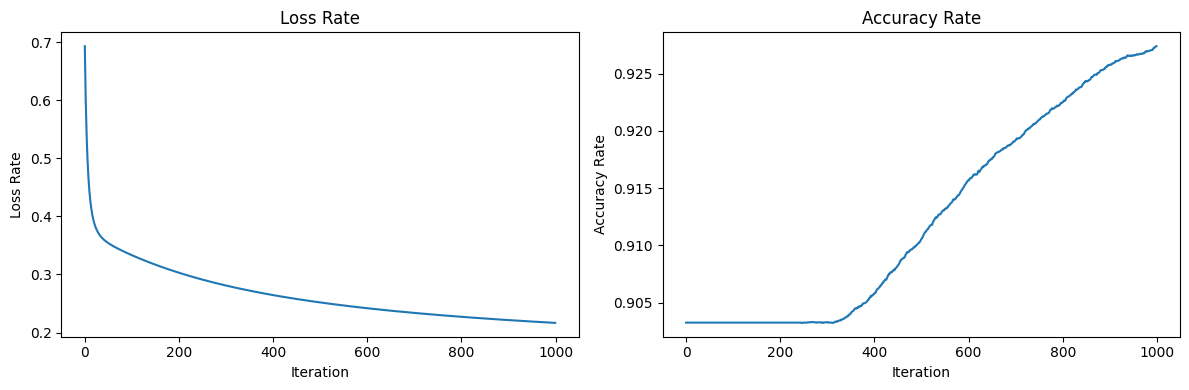

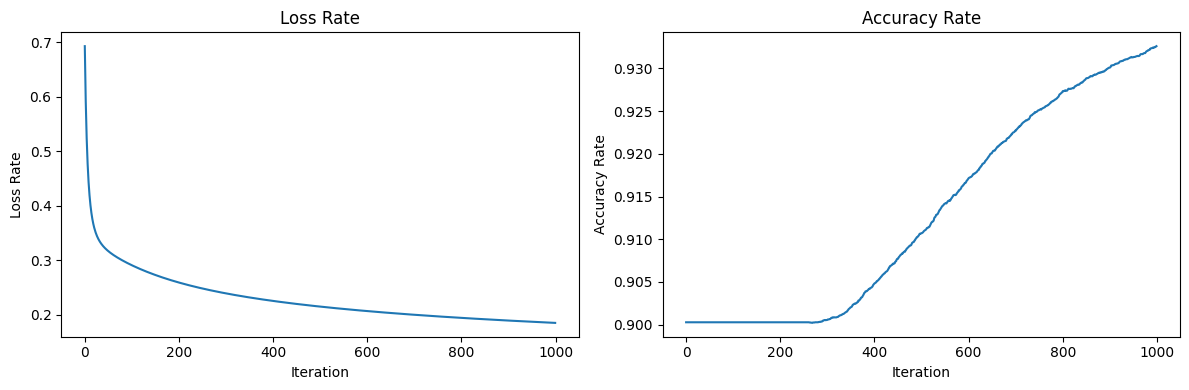

[2 0 9 ... 3 9 2]
模型准确率: 0.8513214285714286


In [18]:
from sklearn.metrics import accuracy_score

# 初始化逻辑回归模型
logistic_regression = LogisticRegression(learning_rate=0.01, num_iterations=1000)

# 在训练集上训练模型
logistic_regression.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logistic_regression.predict(X_test)
print(y_pred)
# 计算模型准确率
accuracy = accuracy_score(y_dev, y_pred)
print("模型准确率:", accuracy)


In [19]:

sample_submission = pd.read_csv("data\\sample_submission.csv")
sample_submission['Label'] = y_pred
sample_submission.to_csv("logit_regression_submission.csv", index=False)
